<a href="https://colab.research.google.com/github/Asritha0606/GenerativeAI/blob/main/CrewAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## What are Agents?

- Agents can execute complex tasks through the use of an architecture that combines LLMs with key modules like planning and memory.

- When building LLM agents, an LLM serves as the main controller or "brain" that controls a flow of operations needed to complete a task or user request.

- Utility of the agent: complex questions requires an LLM to break the task into subparts which can be addressed using tools and a flow of operations that leads to a desired final response.

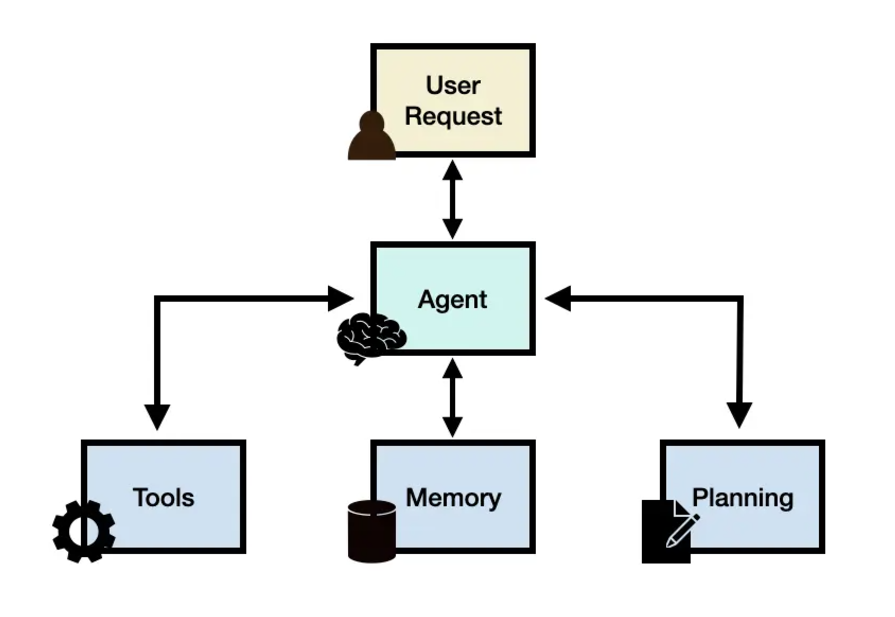

## Crew AI:##

- https://docs.crewai.com/introduction

- Crew means group, this frameworks helps us create a group of agents that all work together to perform a task


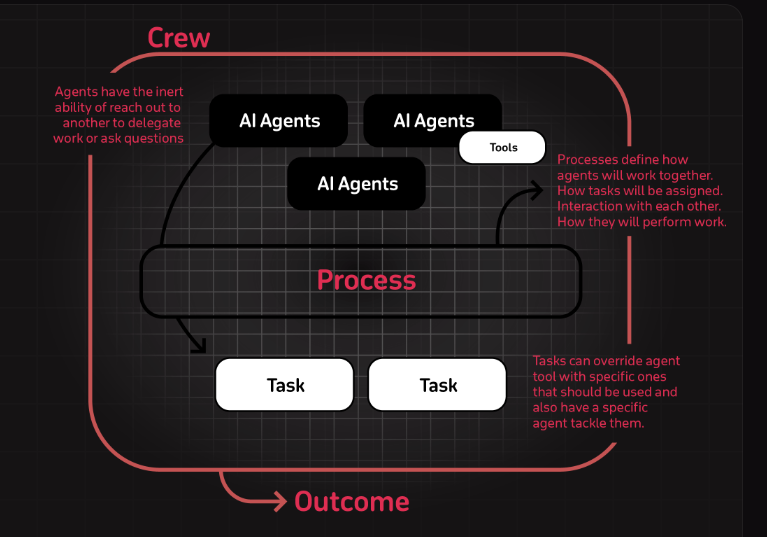

In [ ]:
!pip install -q crewai 'crewai[tools]' langchain_groq --progress-bar off

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
transformers 4.52.4 requires tokenizers<0.22,>=0.21, but you have tokenizers 0.20.3 which is incompatible.


In [ ]:
from crewai import Agent, Task, Crew
from langchain_groq import ChatGroq

In [ ]:
import os
from google.colab import userdata
groq_api_key = userdata.get('groq_api')
os.environ["GROQ_API_KEY"] = groq_api_key

serper_api_key = userdata.get('serper_api')
os.environ["SERPER_API_KEY"] = serper_api_key

In [ ]:
import os
from crewai import LLM
groq_llm = LLM(
    model="groq/llama3-8b-8192",
    temperature=0.3,
    max_tokens=4096,
    api_key=groq_api_key,
)

Create an agent system to **Research and write an article**

**Step#1** : Design your Agents

Parameters- Role, Goal, Backstory, Allow delegation, llm, verbose

1) Planner

2) Writer

3) Editor

**Step#2** : Task creation for the Agents

Parameters- Description, Expected output, Agent

1) Plan

2) Write

3) Edit

**Step#3** : Create the Crew



Let's start building:

Step #1

In [ ]:
planner = Agent(
    role="Content Planner",
    goal="Plan engaging and factually accurate content on {topic}",
    backstory="You're working on planning a blog article "
              "about the topic: {topic}."
              "You collect information that helps the "
              "audience learn something "
              "and make informed decisions. "
              "Your work is the basis for "
              "the Content Writer to write an article on this topic.",
    allow_delegation=False,
    llm=groq_llm,
	  verbose=True
)

In [ ]:
writer = Agent(
    role="Content Writer",
    goal="Write insightful and factually accurate "
         "opinion piece about the topic: {topic}",
    backstory="You're working on a writing "
              "a new opinion piece about the topic: {topic}. "
              "You base your writing on the work of "
              "the Content Planner, who provides an outline "
              "and relevant context about the topic. "
              "You follow the main objectives and "
              "direction of the outline, "
              "as provide by the Content Planner. "
              "You also provide objective and impartial insights "
              "and back them up with information "
              "provide by the Content Planner. "
              "You acknowledge in your opinion piece "
              "when your statements are opinions "
              "as opposed to objective statements.",
    allow_delegation=False,
    verbose=True,
    llm=groq_llm
)

In [ ]:
editor = Agent(
    role="Editor",
    goal="Edit a given blog post to align with "
         "the writing style of the organization. ",
    backstory="You are an editor who receives a blog post "
              "from the Content Writer. "
              "Your goal is to review the blog post "
              "to ensure that it follows journalistic best practices,"
              "provides balanced viewpoints "
              "when providing opinions or assertions, "
              "and also avoids major controversial topics "
              "or opinions when possible.",
    allow_delegation=False,
    verbose=True,
    llm = groq_llm
)

Step #2: Create your tasks

In [ ]:
plan = Task(
    description=(
        "1. Prioritize the latest trends, key players, "
            "and noteworthy news on {topic}.\n"
        "2. Identify the target audience, considering "
            "their interests and pain points.\n"
        "3. Develop a detailed content outline including "
            "an introduction, key points, and a call to action.\n"
        "4. Include SEO keywords and relevant data or sources."
    ),
    expected_output="A comprehensive content plan document "
        "with an outline, audience analysis, "
        "SEO keywords, and resources.",
    agent=planner,
)

In [ ]:
write = Task(
    description=(
        "1. Use the content plan to craft a compelling "
            "blog post on {topic}.\n"
        "2. Incorporate SEO keywords naturally.\n"
		    "3. Sections/Subtitles are properly named "
            "in an engaging manner.\n"
        "4. Ensure the post is structured with an "
            "engaging introduction, insightful body, "
            "and a summarizing conclusion.\n"
        "5. Proofread for grammatical errors and "
            "alignment with the brand's voice.\n"
    ),
    expected_output="A well-written blog post "
        "in markdown format, ready for publication, "
        "each section should have 2 or 3 paragraphs.",
    agent=writer,
)

In [ ]:
edit = Task(
    description=("Proofread the given blog post for "
                 "grammatical errors and "
                 "alignment with the brand's voice."),
    expected_output="A well-written blog post in markdown format, "
                    "ready for publication, "
                    "each section should have 2 or 3 paragraphs.",
    agent=editor
)

Step #3: Create the Crew

In [ ]:
crew = Crew(
    agents=[planner, writer, editor],
    tasks=[plan, write, edit],
    verbose=True,
)

Crew Kickoff

In [ ]:
result = crew.kickoff(inputs={"topic": "Artificial Intelligence"})

╭──────────────────────────────────────────── Crew Execution Started ─────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Started                                                                                         │
│  Name: crew                                                                                                     │
│  ID: 132da8de-9f6f-4d6c-a73a-0b0035437b2a                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

# Agent: Content Planner
## Task: 1. Prioritize the latest trends, key players, and noteworthy news on Artificial Intelligence.
2. Identify the target audience, considering their interests and pain points.
3. Develop a detailed content outline including an introduction, key points, and a call to action.
4. Include SEO keywords and relevant data or sources.


🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: In Progress



# Agent: Content Planner
## Final Answer: 
**Content Plan Document: Artificial Intelligence**

**I. Audience Analysis**

* Target Audience: Tech enthusiasts, business owners, and professionals interested in staying updated on the latest developments in Artificial Intelligence.
* Interests:
	+ Understanding the applications and potential of AI in various industries.
	+ Staying informed about the latest advancements and breakthroughs in AI research.
	+ Exploring the ethical implications and potential risks associated with AI.
* Pain Points:
	+ Difficulty understanding the complex concepts and terminology surrounding AI.
	+ Limited knowledge on how to implement AI solutions in their own businesses or industries.
	+ Concerns about the potential impact of AI on job security and the future of work.

**II. Content Outline**

* Introduction:
	+ Definition and overview of Artificial Intelligence.
	+ Brief history of AI and its evolution.
	+ Importance of AI in today's world.
* Key Points:
	+ 

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Status: Executing Task...
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

🚀 Crew: crew
└── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
       Assigned to: Content Planner
       Status: ✅ Completed
    └── 🤖 Agent: Content Planner
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: b2456a87-33f0-48de-9c7c-2c87cf4da187                                                                     │
│  Agent: Content Planner                                                                                         │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress

# Agent: Content Writer
## Task: 1. Use the content plan to craft a compelling blog post on Artificial Intelligence.
2. Incorporate SEO keywords naturally.
3. Sections/Subtitles are properly named in an engaging manner.
4. Ensure the post is structured with an engaging introduction, insightful body, and a summarizing conclusion.
5. Proofread for grammatical errors and alignment with the brand's voice.



🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: In Progress



# Agent: Content Writer
## Final Answer: 
**The Future of Artificial Intelligence: Understanding the Applications, Trends, and Ethical Considerations**

As we navigate the complex landscape of Artificial Intelligence (AI), it's essential to understand the various applications, trends, and ethical considerations that are shaping the future of this technology. From healthcare to finance, education to entertainment, AI is revolutionizing the way we live and work. In this article, we'll delve into the world of AI, exploring its definition, history, and importance, as well as its applications, trends, and ethical implications.

**The Definition and Overview of Artificial Intelligence**

Artificial Intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has been around for decades, with its roots dating back to the 1950s. However, it wasn't until the 1980s that AI

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Status: Executing Task...
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
└── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
       Assigned to: Content Writer
       Status: ✅ Completed
    └── 🤖 Agent: Content Writer
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af                                                                     │
│  Agent: Content Writer                                                                                          │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress

# Agent: Editor
## Task: Proofread the given blog post for grammatical errors and alignment with the brand's voice.


🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress
        └── 🧠 Thinking...

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: In Progress



# Agent: Editor
## Final Answer: 
**The Future of Artificial Intelligence: Understanding the Applications, Trends, and Ethical Considerations**

As we navigate the complex landscape of Artificial Intelligence (AI), it's essential to understand the various applications, trends, and ethical considerations that are shaping the future of this technology. From healthcare to finance, education to entertainment, AI is revolutionizing the way we live and work. In this article, we'll delve into the world of AI, exploring its definition, history, and importance, as well as its applications, trends, and ethical implications.

**The Definition and Overview of Artificial Intelligence**

Artificial Intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has been around for decades, with its roots dating back to the 1950s. However, it wasn't until the 1980s that AI began t

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Status: Executing Task...
    └── 🤖 Agent: Editor
            Status: ✅ Completed

🚀 Crew: crew
├── 📋 Task: b2456a87-33f0-48de-9c7c-2c87cf4da187
│      Assigned to: Content Planner
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Planner
│           Status: ✅ Completed
├── 📋 Task: a8e3fd28-e9ce-4f0a-b861-1d1562ce06af
│      Assigned to: Content Writer
│      Status: ✅ Completed
│   └── 🤖 Agent: Content Writer
│           Status: ✅ Completed
└── 📋 Task: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a
       Assigned to: Editor
       Status: ✅ Completed
    └── 🤖 Agent: Editor
            Status: ✅ Completed

╭──────────────────────────────────────────────── Task Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Task Completed                                                                                                 │
│  Name: 4218a0bc-0a4b-4df8-8354-d4d189ca9f4a                                                                     │
│  Agent: Editor                                                                                                  │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

╭──────────────────────────────────────────────── Crew Completion ────────────────────────────────────────────────╮
│                                                                                                                 │
│  Crew Execution Completed                                                                                       │
│  Name: crew                                                                                                     │
│  ID: 132da8de-9f6f-4d6c-a73a-0b0035437b2a                                                                       │
│                                                                                                                 │
│                                                                                                                 │
╰─────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

In [ ]:
from IPython.display import Markdown
Markdown(str(result))

**The Future of Artificial Intelligence: Understanding the Applications, Trends, and Ethical Considerations**

As we navigate the complex landscape of Artificial Intelligence (AI), it's essential to understand the various applications, trends, and ethical considerations that are shaping the future of this technology. From healthcare to finance, education to entertainment, AI is revolutionizing the way we live and work. In this article, we'll delve into the world of AI, exploring its definition, history, and importance, as well as its applications, trends, and ethical implications.

**The Definition and Overview of Artificial Intelligence**

Artificial Intelligence refers to the development of computer systems that can perform tasks that typically require human intelligence, such as learning, problem-solving, and decision-making. AI has been around for decades, with its roots dating back to the 1950s. However, it wasn't until the 1980s that AI began to gain traction, with the development of expert systems and rule-based systems. Today, AI is a rapidly growing field, with advancements in machine learning, natural language processing, and deep learning.

**Applications of Artificial Intelligence**

AI has numerous applications across various industries, including:

* **Healthcare**: AI-powered diagnostic tools are being used to detect diseases, such as cancer and diabetes, with high accuracy.
* **Finance**: AI-powered chatbots are being used to provide customer support and automate financial transactions.
* **Education**: AI-powered adaptive learning systems are being used to personalize education and improve student outcomes.
* **Entertainment**: AI-powered virtual assistants are being used to provide personalized recommendations and improve user experiences.

**Current Trends and Advancements in AI Research**

Some of the current trends and advancements in AI research include:

* **Machine Learning**: Machine learning is a type of AI that enables computers to learn from data without being explicitly programmed.
* **Natural Language Processing**: Natural language processing is a type of AI that enables computers to understand and generate human language.
* **Deep Learning**: Deep learning is a type of AI that enables computers to learn from large datasets and make predictions.

**Ethical Considerations and Potential Risks Associated with AI**

As AI continues to evolve, it's essential to consider the ethical implications and potential risks associated with its development and implementation. Some of the ethical considerations include:

* **Job Security**: AI has the potential to automate jobs, leading to job insecurity and unemployment.
* **Data Privacy**: AI requires large amounts of data to function, which raises concerns about data privacy and security.
* **Bias**: AI systems can perpetuate bias and discrimination if they are trained on biased data.

**Case Studies and Success Stories of AI Implementation**

There are numerous case studies and success stories of AI implementation across various industries. For example:

* **Walmart**: Walmart has implemented AI-powered chatbots to provide customer support and improve customer experiences.
* **Google**: Google has implemented AI-powered algorithms to improve search results and provide personalized recommendations.
* **IBM**: IBM has implemented AI-powered predictive analytics to improve customer service and reduce costs.

**Conclusion**

Artificial Intelligence is a rapidly growing field that has the potential to revolutionize the way we live and work. From healthcare to finance, education to entertainment, AI is being used to improve efficiency, reduce costs, and enhance customer experiences. However, it's essential to consider the ethical implications and potential risks associated with AI's development and implementation. As we move forward, it's crucial to prioritize transparency, accountability, and ethical considerations to ensure that AI is used for the greater good.

**Call to Action**

If you're interested in learning more about AI, I encourage you to explore further resources and learning materials on the topic. You can also share your thoughts and opinions on the future of AI and its potential impact on society.

## Key Elements of an Agent:

1) Role Playing: Describe the agent role clearly. For eg. Planner, writer, editor. Curate the role, goal, backstory with keywords.

2) Focus: Divide the tasks effectively, clearly specifying on sub tasks.

3) Tools: Dont create too many tools that might confuse the agents.

4) Cooperation: Take feedback, delegate tasks, collaborate with each other.

5) Guardrails: Prevent hallucinations and accurate results.

6) Memory: Can make a huge difference. It helps the agents to make informed decisions, apply memory in next tasks.

Types of memories: Long term memory, Short term memory and Entity Memory.

**Short Term Memory**:

- Only during Crew execution

- Learnings can be shared amongst the agents during task execution

**Long Term Memory**:

- Can be saved information locally for future improvement in the tasks.

- Leads to self improving agents.

**Entity Memory**:

- Helps to remember entities or subjects like Organisation, Names, etc. For eg. Company name

OVerall memory helps in getting more reliable results.
